In [51]:
import module_loader
import pandas as pd
from modules.curves import *
from modules.dual import Dual
import matplotlib.pyplot as plt

In [52]:
nodes = {
    datetime(2022, 1, 1): Dual(1, {"v0": 1}),
    datetime(2023, 1, 1): Dual(1, {"v1": 1}),
    datetime(2024, 1, 1): Dual(1, {"v2": 1}),
    datetime(2025, 1, 1): Dual(1, {"v3": 1}),
    datetime(2026, 1, 1): Dual(1, {"v4": 1})
}
swaps = {
    Swap(datetime(2022, 1, 1), 12*1, 12, 12): 1.40,
    Swap(datetime(2022, 1, 1), 12*2, 12, 12): 1.50,
    Swap(datetime(2022, 1, 1), 12*3, 12, 12): 1.50,
    Swap(datetime(2022, 1, 1), 12*4, 12, 12): 1.40,
}
ll_cv = SolvedCurve(
    nodes=nodes,
    swaps=list(swaps.keys()),
    obj_rates=list(swaps.values()),
    interpolation="log_linear",
    algorithm="levenberg_marquardt"
)
print("log-linear", ll_cv.iterate())
t = [datetime(2022, 1, 1),datetime(2022, 1, 1),datetime(2022, 1, 1),datetime(2022, 1, 1),
     datetime(2023, 1, 1),
     datetime(2024, 1, 1),
     datetime(2025, 1, 1),
     datetime(2026, 1, 1), datetime(2026, 1, 1), datetime(2026, 1, 1), datetime(2026, 1, 1)]
lc_cv = AdvancedCurve(
    nodes=nodes,
    swaps=list(swaps.keys()),
    obj_rates=list(swaps.values()),
    interpolation="log_linear",
    t = t,
    algorithm="levenberg_marquardt"
)
print("log-cubic", lc_cv.iterate())

log-linear tolerance reached (levenberg_marquardt) after 7 iterations, func: 4.657650620049353e-16
basic solve:  tolerance reached (levenberg_marquardt) after 7 iterations, func: 4.657650620049353e-16
log-cubic tolerance reached (gauss_newton) after 1 iterations, func: 2.01159530831358e-29


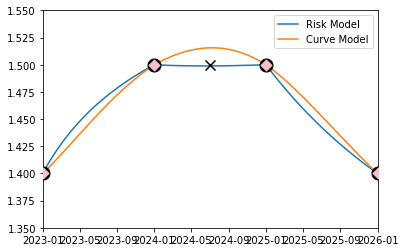

In [53]:
fig, ax = plt.subplots()
x = [datetime(2022,1,1) + i * timedelta(days=1) for i in range(365*4)]
ax.set_ylim(1.35, 1.55)
ax.set_xlim(datetime(2023,1,1), datetime(2026,1,1))
y = [Swap(datetime(2022,1,1), i+1, 365, 365, days=True).rate(ll_cv).real for i in range(365*4)]
z = [Swap(datetime(2022,1,1), i+1, 365, 365, days=True).rate(lc_cv).real for i in range(365*4)]

ax.plot(x, y, label="Risk Model")
ax.plot(x, z, label="Curve Model")
ax.scatter([datetime(2023,1,1), datetime(2024,1,1), datetime(2025,1,1), datetime(2026,1,1)], 
        [1.4, 1.5, 1.5, 1.4],
        marker="D", s=60, c="pink", zorder=3, 
       )
ax.scatter([datetime(2023,1,1), datetime(2024,1,1), datetime(2025,1,1), datetime(2026,1,1)], 
        [1.4, 1.5, 1.5, 1.4],
        marker="o", s=170, c="black", zorder=2, 
       )
ax.scatter([datetime(2024,7,1)], [1.5],
        marker="x", s=100, c="black", zorder=3
       )
ax.legend()
plt.show()

In [54]:
swaps = {
    Swap(datetime(2022, 1, 1), 12*1, 12, 12): 1.50,
    Swap(datetime(2022, 1, 1), 12*2, 12, 12): 1.40,
    Swap(datetime(2022, 1, 1), 12*3, 12, 12): 1.40,
    Swap(datetime(2022, 1, 1), 12*4, 12, 12): 1.50,
}
ll_cv2 = SolvedCurve(
    nodes=nodes,
    swaps=list(swaps.keys()),
    obj_rates=list(swaps.values()),
    interpolation="log_linear",
    algorithm="levenberg_marquardt"
)
print("log-linear", ll_cv2.iterate())
lc_cv2 = AdvancedCurve(
    nodes=nodes,
    swaps=list(swaps.keys()),
    obj_rates=list(swaps.values()),
    interpolation="log_linear",
    t = t,
    algorithm="levenberg_marquardt"
)
print("log-cubic", lc_cv2.iterate())

log-linear tolerance reached (levenberg_marquardt) after 7 iterations, func: 5.250900664670537e-16
basic solve:  tolerance reached (levenberg_marquardt) after 7 iterations, func: 5.250900664670537e-16
log-cubic tolerance reached (gauss_newton) after 1 iterations, func: 1.232595164407831e-29


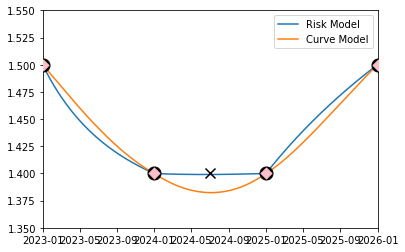

In [55]:
fig, ax = plt.subplots()
x = [datetime(2022,1,1) + i * timedelta(days=1) for i in range(365*4)]
ax.set_ylim(1.35, 1.55)
ax.set_xlim(datetime(2023,1,1), datetime(2026,1,1))
y = [Swap(datetime(2022,1,1), i+1, 365, 365, days=True).rate(ll_cv2).real for i in range(365*4)]
z = [Swap(datetime(2022,1,1), i+1, 365, 365, days=True).rate(lc_cv2).real for i in range(365*4)]

ax.plot(x, y, label="Risk Model")
ax.plot(x, z, label="Curve Model")
ax.scatter([datetime(2023,1,1), datetime(2024,1,1), datetime(2025,1,1), datetime(2026,1,1)], 
        [1.5, 1.4, 1.4, 1.5],
        marker="D", s=60, c="pink", zorder=3, 
       )
ax.scatter([datetime(2023,1,1), datetime(2024,1,1), datetime(2025,1,1), datetime(2026,1,1)], 
        [1.5, 1.4, 1.4, 1.5],
        marker="o", s=170, c="black", zorder=2, 
       )
ax.scatter([datetime(2024,7,1)], [1.4],
        marker="x", s=100, c="black", zorder=3
       )
ax.legend()
plt.show()

In [56]:
swap = Swap(datetime(2022, 1, 1), int(365*2.5)+1, 365, 365, days=True)
df = pd.DataFrame({
    "risk model risk": swap.risk(ll_cv, fixed_rate=swap.rate(ll_cv).real, notional=100e6)[:,0],
    "curve model risk": swap.risk(lc_cv, fixed_rate=swap.rate(lc_cv).real, notional=100e6)[:,0],   
}, index=["1Y", "2Y", "3Y", "4Y"])
df.style.format("{:,.1f}").applymap(lambda v: "color: red;" if v < 0 else "")

fwd tolerance reached (gauss_newton) after 2 iterations, func: 1.688329723596292e-24
bck tolerance reached (gauss_newton) after 2 iterations, func: 1.9905130992291617e-24
fwd tolerance reached (gauss_newton) after 2 iterations, func: 1.4944197751801084e-24
bck tolerance reached (gauss_newton) after 2 iterations, func: 1.6221985278354829e-24
fwd tolerance reached (gauss_newton) after 2 iterations, func: 1.2941723647704121e-24
bck tolerance reached (gauss_newton) after 2 iterations, func: 1.048817937103985e-24
fwd tolerance reached (gauss_newton) after 2 iterations, func: 2.066604452779291e-24
bck tolerance reached (gauss_newton) after 2 iterations, func: 1.9697897725528123e-24
fwd tolerance reached (gauss_newton) after 2 iterations, func: 9.259254875031626e-29
bck tolerance reached (gauss_newton) after 2 iterations, func: 1.0265052529188416e-28
fwd tolerance reached (gauss_newton) after 2 iterations, func: 1.2606983341563295e-28
bck tolerance reached (gauss_newton) after 2 iterations, f

,risk model risk,curve model risk
1Y,-0.1,"-1,171.5"
2Y,"9,784.2","11,856.9"
3Y,"14,578.9","16,564.3"
4Y,0.0,"-2,888.7"


# Bumping curves and how the forwards are affected

In [57]:
nodes = {
    datetime(2022, 1, 1): Dual(1, {"v0": 1}),
    datetime(2023, 1, 1): Dual(1, {"v1": 1}),
    datetime(2024, 1, 1): Dual(1, {"v2": 1}),
    datetime(2025, 1, 1): Dual(1, {"v3": 1}),
    datetime(2026, 1, 1): Dual(1, {"v4": 1}),
    datetime(2027, 1, 1): Dual(1, {"v5": 1}),
    datetime(2028, 1, 1): Dual(1, {"v6": 1}),
    datetime(2029, 1, 1): Dual(1, {"v7": 1}),
    datetime(2030, 1, 1): Dual(1, {"v8": 1}),
    datetime(2031, 1, 1): Dual(1, {"v9": 1}),
}
swaps = {
    Swap(datetime(2022, 1, 1), 12*1, 1, 1): 2.0,
    Swap(datetime(2022, 1, 1), 12*2, 1, 1): 2.0,
    Swap(datetime(2022, 1, 1), 12*3, 1, 1): 2.0,
    Swap(datetime(2022, 1, 1), 12*4, 1, 1): 2.0,
    Swap(datetime(2022, 1, 1), 12*5, 1, 1): 2.0,
    Swap(datetime(2022, 1, 1), 12*6, 1, 1): 2.0,
    Swap(datetime(2022, 1, 1), 12*7, 1, 1): 2.0,
    Swap(datetime(2022, 1, 1), 12*8, 1, 1): 2.0,
    Swap(datetime(2022, 1, 1), 12*9, 1, 1): 2.0,
}
l_cv = SolvedCurve(
    nodes=nodes,
    swaps=list(swaps.keys()),
    obj_rates=list(swaps.values()),
    interpolation="linear",
    algorithm="levenberg_marquardt"
)
ll_cv = SolvedCurve(
    nodes=nodes,
    swaps=list(swaps.keys()),
    obj_rates=list(swaps.values()),
    interpolation="log_linear",
    algorithm="levenberg_marquardt"
)
lzr_cv = SolvedCurve(
    nodes=nodes,
    swaps=list(swaps.keys()),
    obj_rates=list(swaps.values()),
    interpolation="linear_zero_rate",
    algorithm="levenberg_marquardt"
)
print("linear", l_cv.iterate())
print("log-linear", ll_cv.iterate())
print("linear-zero-rate", lzr_cv.iterate())
t = [datetime(2022, 1, 1),datetime(2022, 1, 1),datetime(2022, 1, 1),datetime(2022, 1, 1),
     datetime(2023, 1, 1),
     datetime(2024, 1, 1),
     datetime(2025, 1, 1),
     datetime(2026, 1, 1),
     datetime(2027, 1, 1),
     datetime(2028, 1, 1),
     datetime(2029, 1, 1),
     datetime(2030, 1, 1),
     datetime(2031, 1, 1), datetime(2031, 1, 1), datetime(2031, 1, 1), datetime(2031, 1, 1)]
lc_cv = AdvancedCurve(
    nodes=nodes,
    swaps=list(swaps.keys()),
    obj_rates=list(swaps.values()),
    interpolation="log_linear",
    t = t,
    algorithm="levenberg_marquardt"
)
print("log-cubic", lc_cv.iterate())
swaps2 = {
    Swap(datetime(2022, 1, 1), 12*1, 1, 1): 2.0,
    Swap(datetime(2022, 1, 1), 12*2, 1, 1): 2.0,
    Swap(datetime(2022, 1, 1), 12*3, 1, 1): 2.0,
    Swap(datetime(2022, 1, 1), 12*4, 1, 1): 2.0,
    Swap(datetime(2022, 1, 1), 12*5, 1, 1): 2.001,
    Swap(datetime(2022, 1, 1), 12*6, 1, 1): 2.0,
    Swap(datetime(2022, 1, 1), 12*7, 1, 1): 2.0,
    Swap(datetime(2022, 1, 1), 12*8, 1, 1): 2.0,
    Swap(datetime(2022, 1, 1), 12*9, 1, 1): 2.0,
}
l_cv2 = SolvedCurve(
    nodes=nodes,
    swaps=list(swaps2.keys()),
    obj_rates=list(swaps2.values()),
    interpolation="linear",
    algorithm="levenberg_marquardt"
)
ll_cv2 = SolvedCurve(
    nodes=nodes,
    swaps=list(swaps2.keys()),
    obj_rates=list(swaps2.values()),
    interpolation="log_linear",
    algorithm="levenberg_marquardt"
)
lzr_cv2 = SolvedCurve(
    nodes=nodes,
    swaps=list(swaps2.keys()),
    obj_rates=list(swaps2.values()),
    interpolation="linear_zero_rate",
    algorithm="levenberg_marquardt"
)
lc_cv2 = AdvancedCurve(
    nodes=nodes,
    swaps=list(swaps2.keys()),
    obj_rates=list(swaps2.values()),
    interpolation="log_linear",
    t = t,
    algorithm="levenberg_marquardt"
)
print("linear2", l_cv2.iterate())
print("log-linear2", ll_cv2.iterate())
print("linear-zer-rate2", lzr_cv2.iterate())
print("log-cubic2", lc_cv2.iterate())

linear tolerance reached (levenberg_marquardt) after 9 iterations, func: 1.0827578284970214e-15
log-linear tolerance reached (levenberg_marquardt) after 9 iterations, func: 1.0805211574968326e-15
linear-zero-rate tolerance reached (levenberg_marquardt) after 9 iterations, func: 1.0984409740118223e-15
basic solve:  tolerance reached (levenberg_marquardt) after 9 iterations, func: 1.0805211574968326e-15
log-cubic tolerance reached (gauss_newton) after 1 iterations, func: 7.099748146989106e-30
linear2 tolerance reached (levenberg_marquardt) after 9 iterations, func: 1.0826217705043603e-15
log-linear2 tolerance reached (levenberg_marquardt) after 9 iterations, func: 1.0803714614399236e-15
linear-zer-rate2 tolerance reached (levenberg_marquardt) after 9 iterations, func: 1.0980364984632645e-15
basic solve:  tolerance reached (levenberg_marquardt) after 9 iterations, func: 1.0803714614399236e-15
log-cubic2 tolerance reached (gauss_newton) after 1 iterations, func: 1.0136862632090002e-28


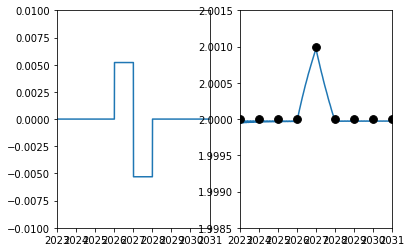

In [58]:
fig, (ax1, ax2) = plt.subplots(1,2)
x = [datetime(2022,1,1) + i * timedelta(days=1) for i in range(365*9)]
ax1.set_ylim(-0.01, 0.01)
ax1.set_xlim(datetime(2023,1,1), datetime(2031,1,1))
ax2.set_xlim(datetime(2023,1,1), datetime(2031,1,1))
ax2.set_ylim(1.9985, 2.0015)
y_0 = [ll_cv.rate(start=datetime(2022,1,1) + timedelta(days=i), days=1).real for i in range(365*9)]
y = [ll_cv2.rate(start=datetime(2022,1,1) + timedelta(days=i), days=1).real for i in range(365*9)]
z = [Swap(datetime(2022,1,1), i+1, 30, 30, days=True).rate(ll_cv2).real for i in range(365*9)]

ax1.plot(x, [y[i]-y_0[i] for i in range(len(y))], label="Bump difference")
# ax1.plot(x, y, label="Risk Model")
ax2.plot(x, z, label="Curve Model")
ax2.scatter([datetime(2023,1,1), datetime(2024,1,1), datetime(2025,1,1), datetime(2026,1,1),
           datetime(2027,1,1), datetime(2028,1,1), datetime(2029,1,1), datetime(2030,1,1),
            datetime(2031,1,1),
           ], 
        [2,2,2,2,2.001,2,2,2,2],
        marker="o", s=60, c="black", zorder=3, 
       )
# ax.legend()

plt.show()

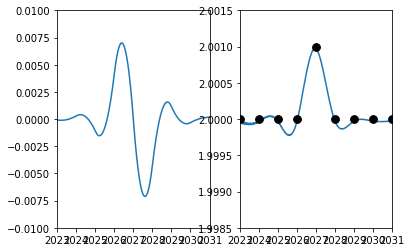

In [60]:
fig, (ax1, ax2) = plt.subplots(1,2)
x = [datetime(2022,1,1) + i * timedelta(days=1) for i in range(365*9)]
ax1.set_ylim(-0.01, 0.01)
ax1.set_xlim(datetime(2023,1,1), datetime(2031,1,1))
ax2.set_xlim(datetime(2023,1,1), datetime(2031,1,1))
ax2.set_ylim(1.9985, 2.0015)
y_0 = [lc_cv.rate(start=datetime(2022,1,1) + timedelta(days=i), days=1).real for i in range(365*9)]
y = [lc_cv2.rate(start=datetime(2022,1,1) + timedelta(days=i), days=1).real for i in range(365*9)]
z = [Swap(datetime(2022,1,1), i+1, 30, 30, days=True).rate(lc_cv2).real for i in range(365*9)]

ax1.plot(x, [y[i]-y_0[i] for i in range(len(y))], label="Bump difference")
ax2.plot(x, z, label="Curve Model")
ax2.scatter([datetime(2023,1,1), datetime(2024,1,1), datetime(2025,1,1), datetime(2026,1,1),
           datetime(2027,1,1), datetime(2028,1,1), datetime(2029,1,1), datetime(2030,1,1),
            datetime(2031,1,1),
           ], 
        [2,2,2,2,2.001,2,2,2,2],
        marker="o", s=60, c="black", zorder=3, 
       )
# ax.legend()

plt.show()

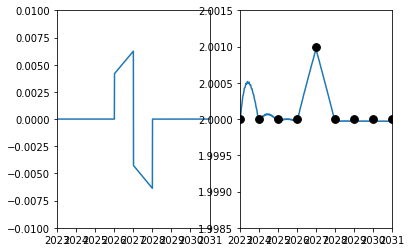

In [61]:
fig, (ax1, ax2) = plt.subplots(1,2)
x = [datetime(2022,1,1) + i * timedelta(days=1) for i in range(365*9)]
ax1.set_ylim(-0.01, 0.01)
ax1.set_xlim(datetime(2023,1,1), datetime(2031,1,1))
ax2.set_xlim(datetime(2023,1,1), datetime(2031,1,1))
ax2.set_ylim(1.9985, 2.0015)
y_0 = [lzr_cv.rate(start=datetime(2022,1,1) + timedelta(days=i), days=1).real for i in range(365*9)]
y = [lzr_cv2.rate(start=datetime(2022,1,1) + timedelta(days=i), days=1).real for i in range(365*9)]
z = [Swap(datetime(2022,1,1), i+1, 30, 30, days=True).rate(lzr_cv2).real for i in range(365*9)]

ax1.plot(x, [y[i]-y_0[i] for i in range(len(y))], label="Bump difference")
ax2.plot(x, z, label="Curve Model")
ax2.scatter([datetime(2023,1,1), datetime(2024,1,1), datetime(2025,1,1), datetime(2026,1,1),
           datetime(2027,1,1), datetime(2028,1,1), datetime(2029,1,1), datetime(2030,1,1),
            datetime(2031,1,1),
           ], 
        [2,2,2,2,2.001,2,2,2,2],
        marker="o", s=60, c="black", zorder=3, 
       )
# ax.legend()

plt.show()

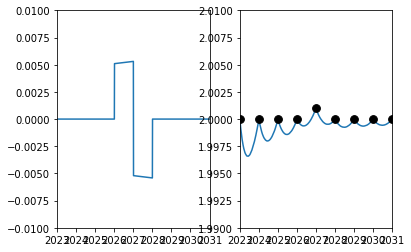

In [62]:
fig, (ax1, ax2) = plt.subplots(1,2)
x = [datetime(2022,1,1) + i * timedelta(days=1) for i in range(365*9)]
ax1.set_ylim(-0.01, 0.01)
ax1.set_xlim(datetime(2023,1,1), datetime(2031,1,1))
ax2.set_xlim(datetime(2023,1,1), datetime(2031,1,1))
ax2.set_ylim(1.99, 2.01)
y_0 = [l_cv.rate(start=datetime(2022,1,1) + timedelta(days=i), days=1).real for i in range(365*9)]
y = [l_cv2.rate(start=datetime(2022,1,1) + timedelta(days=i), days=1).real for i in range(365*9)]
z = [Swap(datetime(2022,1,1), i+1, 30, 30, days=True).rate(l_cv2).real for i in range(365*9)]

ax1.plot(x, [y[i]-y_0[i] for i in range(len(y))], label="Bump difference")
ax2.plot(x, z, label="Curve Model")
ax2.scatter([datetime(2023,1,1), datetime(2024,1,1), datetime(2025,1,1), datetime(2026,1,1),
           datetime(2027,1,1), datetime(2028,1,1), datetime(2029,1,1), datetime(2030,1,1),
            datetime(2031,1,1),
           ], 
        [2,2,2,2,2.001,2,2,2,2],
        marker="o", s=60, c="black", zorder=3, 
       )
# ax.legend()

plt.show()

### Second layer supposition

Suppose that the 4y and 6y tenors were second layer control points. That means in the first stage they are effectively interpolated by the curve. If we assume that their control **skews** are not impacted by the bumping process then they are allowed to vary as the 5y rate is bumped.

In [29]:
nodes = {
    datetime(2022, 1, 1): Dual(1, {"v0": 1}),
    datetime(2023, 1, 1): Dual(1, {"v1": 1}),
    datetime(2024, 1, 1): Dual(1, {"v2": 1}),
    datetime(2025, 1, 1): Dual(1, {"v3": 1}),
    datetime(2027, 1, 1): Dual(1, {"v4": 1}),
    datetime(2029, 1, 1): Dual(1, {"v5": 1}),
    datetime(2030, 1, 1): Dual(1, {"v6": 1}),
    datetime(2031, 1, 1): Dual(1, {"v7": 1}),
}
swaps = {
    Swap(datetime(2022, 1, 1), 12*1, 1, 1): 2.0,
    Swap(datetime(2022, 1, 1), 12*2, 1, 1): 2.0,
    Swap(datetime(2022, 1, 1), 12*3, 1, 1): 2.0,
    Swap(datetime(2022, 1, 1), 12*5, 1, 1): 2.0,
    Swap(datetime(2022, 1, 1), 12*7, 1, 1): 2.0,
    Swap(datetime(2022, 1, 1), 12*8, 1, 1): 2.0,
    Swap(datetime(2022, 1, 1), 12*9, 1, 1): 2.0,
}
t = [datetime(2022, 1, 1),datetime(2022, 1, 1),datetime(2022, 1, 1),datetime(2022, 1, 1),
     datetime(2023, 1, 1),
     datetime(2024, 1, 1),
     datetime(2025, 1, 1),
     datetime(2027, 1, 1),
     datetime(2029, 1, 1),
     datetime(2030, 1, 1),
     datetime(2031, 1, 1), datetime(2031, 1, 1), datetime(2031, 1, 1), datetime(2031, 1, 1)]
lc_cv = AdvancedCurve(
    nodes=nodes,
    swaps=list(swaps.keys()),
    obj_rates=list(swaps.values()),
    interpolation="log_linear",
    t = t,
    algorithm="levenberg_marquardt"
)
print("log-cubic", lc_cv.iterate())
swaps2 = {
    Swap(datetime(2022, 1, 1), 12*1, 1, 1): 2.0,
    Swap(datetime(2022, 1, 1), 12*2, 1, 1): 2.0,
    Swap(datetime(2022, 1, 1), 12*3, 1, 1): 2.0,
    Swap(datetime(2022, 1, 1), 12*5, 1, 1): 2.001,
    Swap(datetime(2022, 1, 1), 12*7, 1, 1): 2.0,
    Swap(datetime(2022, 1, 1), 12*8, 1, 1): 2.0,
    Swap(datetime(2022, 1, 1), 12*9, 1, 1): 2.0,
}
lc_cv2 = AdvancedCurve(
    nodes=nodes,
    swaps=list(swaps2.keys()),
    obj_rates=list(swaps2.values()),
    interpolation="log_linear",
    t = t,
    algorithm="levenberg_marquardt"
)
print("log-cubic2", lc_cv2.iterate())

basic solve:  tolerance reached (levenberg_marquardt) after 9 iterations, func: 1.086149357061105e-15
log-cubic tolerance reached (gauss_newton) after 1 iterations, func: 2.055968734232262e-29
basic solve:  tolerance reached (levenberg_marquardt) after 9 iterations, func: 1.0858643508094976e-15
log-cubic2 tolerance reached (gauss_newton) after 1 iterations, func: 2.5268595300813145e-26


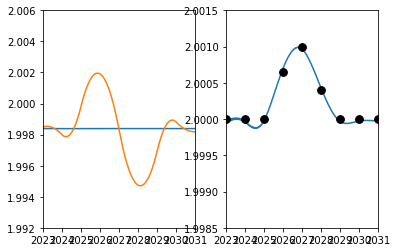

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2)
x = [datetime(2022,1,1) + i * timedelta(days=1) for i in range(365*9)]
ax1.set_ylim(1.992, 2.006)
ax1.set_xlim(datetime(2023,1,1), datetime(2031,1,1))
ax2.set_xlim(datetime(2023,1,1), datetime(2031,1,1))
ax2.set_ylim(1.9985, 2.0015)
y_0 = [lc_cv.rate(start=datetime(2022,1,1) + timedelta(days=i), days=1).real for i in range(365*9)]
y = [lc_cv2.rate(start=datetime(2022,1,1) + timedelta(days=i), days=1).real for i in range(365*9)]
z = [Swap(datetime(2022,1,1), i+1, 30, 30, days=True).rate(lc_cv2).real for i in range(365*9)]

ax1.plot(x, y_0, label="Risk Model")
ax1.plot(x, y, label="Risk Model")
ax2.plot(x, z, label="Curve Model")
ax2.scatter([datetime(2023,1,1), datetime(2024,1,1), datetime(2025,1,1), datetime(2026,1,1),
           datetime(2027,1,1), datetime(2028,1,1), datetime(2029,1,1), datetime(2030,1,1),
            datetime(2031,1,1),
           ], 
        [2,2,2,2.00065,2.001,2.0004,2,2,2],
        marker="o", s=60, c="black", zorder=3, 
       )
# ax.legend()

plt.show()